# Lab 7 - 17/11

Link github: https://github.com/ilariavascotto/UL_2023_fall

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
import warnings
import time
import myfunctions as f

## Ex 1

In [2]:
# Data preprocessing
cancer = pd.read_csv('Datasets/breast_cancer.csv', header=None)
cancer = cancer.astype(str)
encoder = OrdinalEncoder()
cancer = encoder.fit_transform(np.array(cancer))
features = cancer[:,0:9]
y = cancer[:,9]

In [3]:
# Computation of the mutual information
n_features = np.shape(features)[1]
mut_info = [f.mutual_information(features[:,i], y) for i in range(n_features)]
for i in range(n_features):
    print(f"The mutual information between feature {i+1} and y is: {mut_info[i]}")

The mutual information between feature 1 and y is: 0.007351488869802244
The mutual information between feature 2 and y is: 0.0013874137755948493
The mutual information between feature 3 and y is: 0.03962800432797562
The mutual information between feature 4 and y is: 0.04782375078198955
The mutual information between feature 5 and y is: 0.03702975385485487
The mutual information between feature 6 and y is: 0.05337916214722866
The mutual information between feature 7 and y is: 0.0017252353149642356
The mutual information between feature 8 and y is: 0.010443386597396515
The mutual information between feature 9 and y is: 0.017896383627431005


In [4]:
print(f"The most significant feature is feature #{np.argmax(mut_info)+1}, having mutual information with y equal to {'{0:.5f}'.format(mut_info[np.argmax(mut_info)])}.")

The most significant feature is feature #6, having mutual information with y equal to 0.05338.


## Ex 2

In [5]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    data = np.array(pd.read_csv('Datasets/s3.txt', sep = '    ', header=None))

In [6]:
n_iter = 10
labels = np.zeros((n_iter, np.shape(data)[0]))
losses = np.zeros(n_iter)
for i in range(n_iter):
    start = time.time()
    labels[i,:], losses[i] = f.k_means(data, 15)
    stop = time.time()
    duration = stop-start
    print(f"Round {i+1}, elapsed time: {duration}")
idx_min = np.argmin(losses)
idx_max = np.argmax(losses)

Round 1, elapsed time: 0.48871827125549316
Round 2, elapsed time: 0.4796793460845947
Round 3, elapsed time: 0.4666450023651123
Round 4, elapsed time: 0.47524261474609375
Round 5, elapsed time: 0.4646456241607666
Round 6, elapsed time: 0.46570539474487305
Round 7, elapsed time: 0.5012004375457764
Round 8, elapsed time: 0.4595296382904053
Round 9, elapsed time: 0.4635601043701172
Round 10, elapsed time: 0.45523905754089355


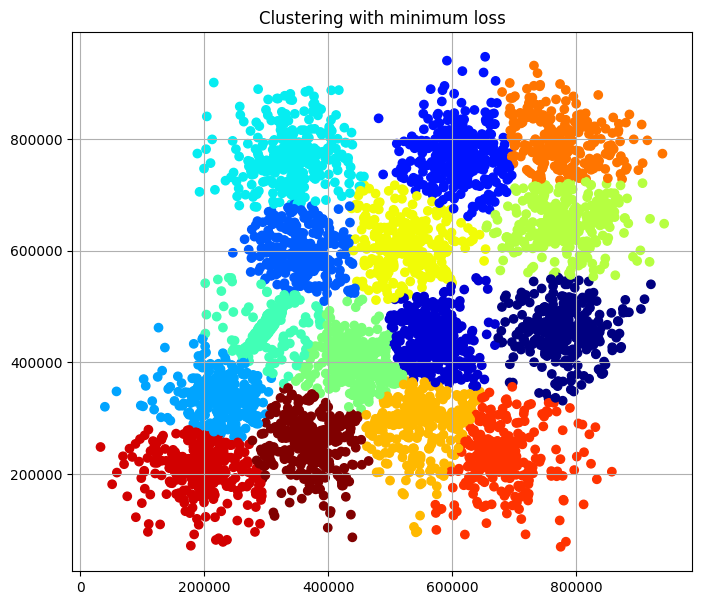

In [7]:
cmap = plt.get_cmap('jet', 15)
plt.figure(figsize=(8,7))
plt.scatter(data[:,0], data[:,1], c = labels[idx_min, :], cmap = cmap)
plt.title('Clustering with minimum loss')
plt.grid()
plt.show()

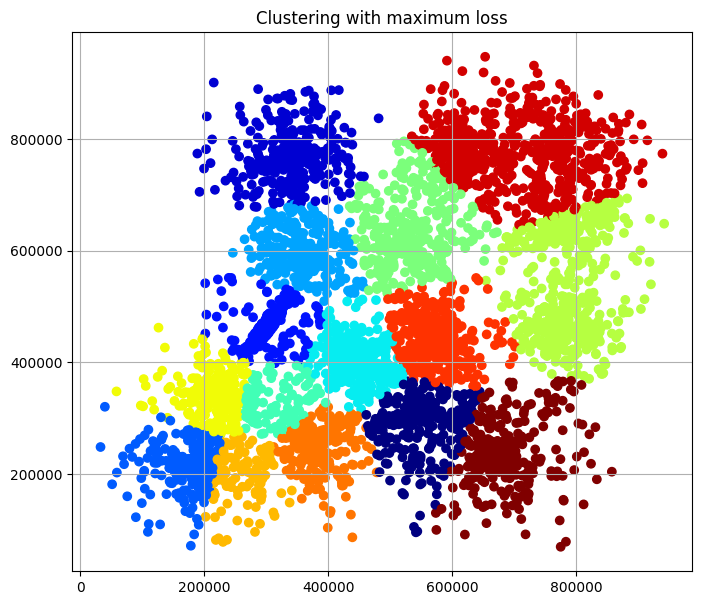

In [8]:
plt.figure(figsize=(8,7))
plt.scatter(data[:,0], data[:,1], c = labels[idx_max, :], cmap = cmap)
plt.title('Clustering with maximum loss')
plt.grid()
plt.show()

In [9]:
print(f"The maximum value of the loss is {'{0:.2f}'.format(100*(losses[idx_max] - losses[idx_min])/losses[idx_min])}% higher with respect to the minimum value.")

The maximum value of the loss is 48.35% higher with respect to the minimum value.
